# Change jupyter config

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Libraries

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from operator import itemgetter
import json
from matplotlib import cm
import matplotlib.colors as colors
import seaborn as sns
import pandas as pd
from matplotlib.ticker import FormatStrFormatter

In [37]:
plot_save_dir = "/home/kaijunge/Documents/PhD/CREATE Lab Git Repo/Raspberry/raspberry-grasping/data/plots_kai"
# plot_save_dir = "/Users/kaijunge/Documents/PhD/gitlab/raspberry-grasping/data/plots_kai"

# Directory handling

In [4]:
data = {}

for force_setting in ["Low", "Medium", "High"]:

    foler_path =  "raspberry-robot-plots-data/Lab Vs Field/Lab/w K2/" + force_setting + " Force"

    data[force_setting] = {"Time":{}, "Fc":{}, "Fp":{}}

    for subdir, dirs, files in os.walk(foler_path):
        if subdir == foler_path:
            continue

        folder_name = subdir[len(foler_path) + 1:]

        target = ""
        if "Compression" in folder_name:
            target = "Fc"

        if "Pulling" in folder_name:
            target ="Fp"

        if "Time" in folder_name:
            target = "Time"

        if target != "":
            for file in files:
                f = subdir + "/" + file
                exp_id = int(file[-5:-4])
                csv = np.genfromtxt(f, delimiter=',')
                
                if target != "Time":
                    data[force_setting][target][exp_id] = csv * (9.8 / 1000)
                else:
                    data[force_setting][target][exp_id] = csv


In [5]:
print(data["High"]["Time"][2])

[ 0.69489312  0.80670094  0.93476558  1.04681158  1.15971518  1.27085233
  1.39944601  1.51170468  1.62321639  1.73541713  1.86366558  1.99060893
  2.10262656  2.21536136  2.3273139   2.43939734  2.56705523  2.69475722
  2.80649233  2.91953945  3.04655576  3.15904069  3.2707417   3.39852715
  3.51117063  3.63894653  3.75064945  3.86332798  3.97565007  4.08665943
  4.19859481  4.32724905  4.43895245  4.55065203  4.66335058  4.7750535
  4.90277028  5.0305078   5.14268899  5.25492859  5.36655426  5.47848392
  5.60648441  5.71914196  5.83084345  5.94254255  6.05475092  6.16645336
  6.27834702  6.40641522  6.5185554   6.63125467  6.74301028  6.85433435
  6.96669006  7.09434724  7.71896267  7.8306365   7.94276404  8.05439019
  8.16634798  8.29460478  8.40672064  8.51828313  8.64729524  8.75835371
  8.87056327  8.9821732   9.09428334  9.22281837  9.35031223  9.47815871
  9.60612011  9.71887374  9.84667873  9.95845461 10.07012391 10.18282104
 10.31048155 10.42218184 10.55083799 10.66239095 10.

# Plotting

In [6]:
low_colour = '#f0d002'
low_error_colour = '#8a7701'
medium_colour = '#eb8602'
medium_error_colour = '#7a4601'
high_colour = '#e30291'
high_error_colour = '#94015f'
robot_field = '#74C4C0'
robot_lab = 'C0'
setpoint_color1 = '#f7c728'
setpoint_color2 = '#fca821'
setpoint_color3 = '#fc7c19'

In [7]:
# Make Controller setpoint curve
sp1 = 2
sp2 = 0.42
change_time = 6.8
end_time = 8.4

ctrl1 = [np.linspace(0, change_time, 1000), np.linspace(sp1, sp1, 1000)]
ctrl2 = [np.linspace(change_time, end_time, 1000), np.linspace(sp2, sp2, 1000)]
transition = [[change_time, change_time], [1000, -1000]]

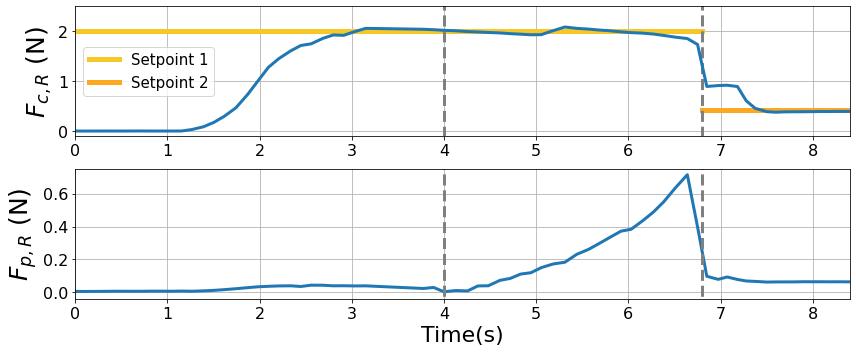

In [8]:
filename = "controller_form"

force_setting = "Medium"
exp_id = 2
width = 3
setpoint_width = 5
tick_font = 16
label_font = 25

start_index = 40

time_data_temp = data[force_setting]["Time"][exp_id][start_index:]
time_data = time_data_temp - time_data_temp[0]

start_pull = [[4, 4], [1000, -1000]]

fig, axs = plt.subplots(2, 1, figsize = (12, 5))


for ax in axs:
    ax.set_xlim([0, end_time])
    ax.grid()
    
ax = axs[0]
ax.tick_params(axis='both', which='major', labelsize=tick_font)
ax.set_ylabel("$F_{c,R}$ (N)", fontsize = label_font)
ax.set_ylim([-0.1, 2.5])

ax.plot(ctrl1[0], ctrl1[1], color = setpoint_color1, linewidth = setpoint_width, label = "Setpoint 1")
ax.plot(ctrl2[0], ctrl2[1], color = setpoint_color2, linewidth = setpoint_width, label = "Setpoint 2")

ax.plot(transition[0], transition[1], color = "grey", linewidth = 3, linestyle = "--")
ax.plot(start_pull[0], start_pull[1], color = "grey", linewidth = 3, linestyle = "--")

ax.plot(time_data, data[force_setting]["Fc"][exp_id][start_index:], color = robot_lab, linewidth = width)

ax.legend(loc = "center left", fontsize = 15)


ax = axs[1]
ax.tick_params(axis='both', which='major', labelsize=tick_font)
ax.set_ylabel("$F_{p, R}$ (N)", fontsize = label_font)
ax.set_xlabel("Time(s)", fontsize = label_font - 3)
ax.set_ylim([-0.04, 0.75])
ax.plot(time_data, data[force_setting]["Fp"][exp_id][start_index:], color = robot_lab, linewidth = width)
ax.plot(transition[0], transition[1], color = "grey", linewidth = 3, linestyle = "--")
ax.plot(start_pull[0], start_pull[1], color = "grey", linewidth = 3, linestyle = "--")

    
plt.tight_layout()
# plt.savefig(plot_save_dir + '/'+ filename + '.pdf')  
plt.show()

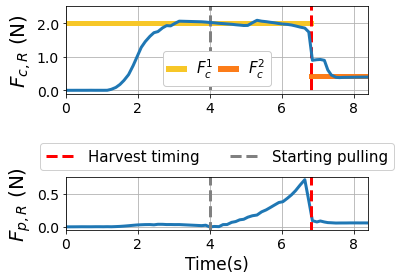

In [47]:
filename = "controller_form2"

force_setting = "Medium"
exp_id = 2
width = 3
setpoint_width = 5
tick_font = 14
label_font = 20

start_index = 40

time_data_temp = data[force_setting]["Time"][exp_id][start_index:]
time_data = time_data_temp - time_data_temp[0]

start_pull = [[4, 4], [1000, -1000]]

fig, axs = plt.subplots(2, 1, figsize = (5.6, 4), gridspec_kw={'height_ratios': [2, 1.2]})


for ax in axs:
    ax.set_xlim([0, end_time])
    ax.grid()
    
ax = axs[0]
ax.tick_params(axis='both', which='major', labelsize=tick_font)
# ax.set_ylabel("$F_{c}$ (N)", fontsize = label_font)
ax.set_ylabel("$F_{c,R}$ (N)", fontsize = label_font)
ax.set_ylim([-0.1, 2.5])

ax.plot(ctrl1[0], ctrl1[1], color = setpoint_color1, linewidth = setpoint_width, label = "$F_c^1$")
ax.plot(ctrl2[0], ctrl2[1], color = setpoint_color3, linewidth = setpoint_width, label = "$F_c^2$")

ax.plot(transition[0], transition[1], color = "red", linewidth = 3, linestyle = "--")
ax.plot(start_pull[0], start_pull[1], color = "grey", linewidth = 3, linestyle = "--")

ax.plot(time_data, data[force_setting]["Fc"][exp_id][start_index:], color = robot_lab, linewidth = width)

leg = ax.legend(loc = "lower center", fontsize = 15, framealpha=1, handlelength = 1, columnspacing = 0.5, ncol = 2)
for line in leg.get_lines():
    line.set_linewidth(6.0)

ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

ax = axs[1]
ax.tick_params(axis='both', which='major', labelsize=tick_font)
ax.set_ylabel("$F_{p,R}$ (N)", fontsize = label_font)
ax.set_xlabel("Time(s)", fontsize = label_font - 3)

ax.set_ylim([-0.04, 0.75])

ax.plot(time_data, data[force_setting]["Fp"][exp_id][start_index:], color = robot_lab, linewidth = width)
ax.plot(transition[0], transition[1], color = "red", linewidth = 3, linestyle = "--", label = "Harvest timing")
ax.plot(start_pull[0], start_pull[1], color = "grey", linewidth = 3, linestyle = "--", label = "Starting pulling")

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.8), fontsize = 15, framealpha=0.9, ncol =2)

plt.tight_layout()
plt.savefig(plot_save_dir + '/'+ filename + '.pdf')  
plt.show()

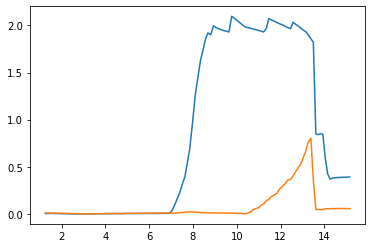

In [9]:
force_setting = "Medium"


plt.plot(data[force_setting]["Time"][1], data[force_setting]["Fc"][1])
plt.plot(data[force_setting]["Time"][1], data[force_setting]["Fp"][1])

In [10]:
for lvl, dir in enumerate(dirs):
    human_trials_r = []
    human_trials_l = []
    all_times = []
    for i in range(1,6):
        # for i, trial in enumerate(os.listdir(directory))
        file_name = dir+'/human trial'+str(i)+'.txt'
        with open(file_name, 'r+') as f:
            trial_r = []
            trial_l = []
            time = []
            i = 0
            while True:
                line = f.readline()
                if not line:
                    break
                if i > 3:
                    if float(line[6:14]) > 0.6:
                        time.append(float(line[6:14]))
                        trial_r.append(float(line[15:35]))
                        trial_l.append(float(line[36::]))
                i += 1
        all_times.append(time)
        human_trials_r.append(trial_r)
        human_trials_l.append(trial_l)